In [9]:
import datetime
import pyaurorax
import numpy as np

aurorax = pyaurorax.PyAuroraX()
at = aurorax.tools

at.set_theme("dark")  # we';l use dark theme for this example

# Create a custom keogram

We can generate keograms from a custom slice of a set of images. The slice used is defined by a set of points in CCD, geographic, or geomagnetic coordinates, within the bounds of the image data.

Let's have a look at an example of this using some THEMIS data, and then some TREx RGB data.

## THEMIS custom keogram in CCD space

In [36]:
# download an hour of THEMIS ASI data
dataset_name = "THEMIS_ASI_RAW"
start_dt = datetime.datetime(2021, 11, 4, 9, 0)
end_dt = datetime.datetime(2021, 11, 4, 9, 59)
site_uid = "atha"
r = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site_uid)

# read in the hour of data
data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=5)

# scale all the images
#
# NOTE: you can scale all images or just one image
images_scaled = at.scale_intensity(data.data, min=1000, max=10000)

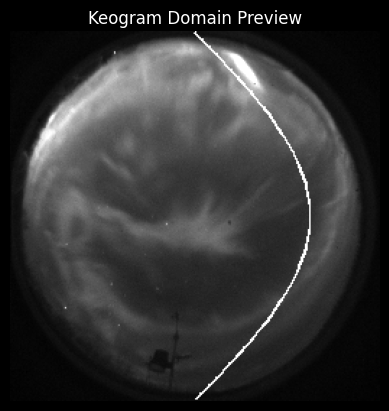

In [37]:
# define a curve in CCD space
ccd_y = np.linspace(0, 255, 50)
ccd_x = 127.5 + 80 * np.sin(np.pi * ccd_y / 255)

# create the custom keogram
custom_keogram = at.keogram.create_custom(
    images_scaled,
    data.timestamp,
    coordinate_system="ccd",
    width=2,
    x_locs=ccd_x,
    y_locs=ccd_y,
    preview=True,
)

/usr/local/src/pyaurorax/pyaurorax/tools/classes/keogram.py:368: UserWarning: Unable to plot y-axis. If this keogram object was create as part of the custom_keogram routines, this is expected and plotting a custom keogram with axes is not supported at this time.
  warnings.warn(


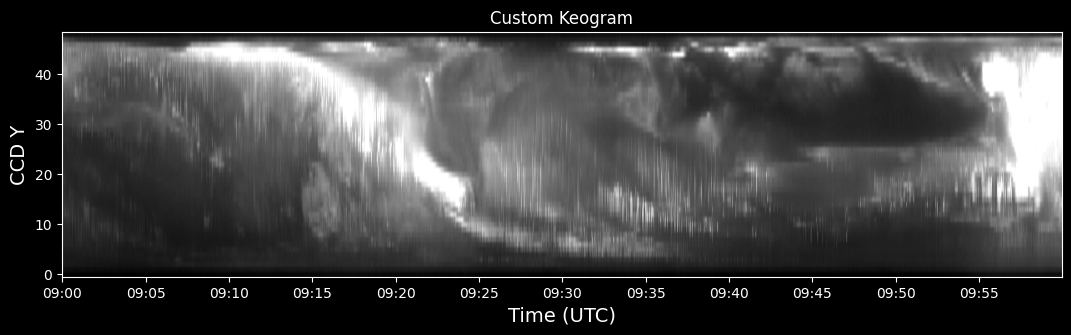

In [38]:
# plot the keogram
custom_keogram.plot(title="Custom Keogram", figsize=(10, 6), aspect=6, cmap="gray")

## TREx RGB custom keogram in lat/lon space

In [40]:
# download and read an hour of TREx RGB Data
dataset_name = "TREX_RGB_RAW_NOMINAL"
start_dt = datetime.datetime(2021, 11, 4, 3, 0)
end_dt = datetime.datetime(2021, 11, 4, 3, 59)
site_uid = "gill"
r = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site_uid)
rgb_data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=5)

# download ann read the corresponding skymap
dataset_name = "TREX_RGB_SKYMAP_IDLSAV"
r = aurorax.data.ucalgary.download_best_skymap(dataset_name, site_uid, start_dt)
skymap_data = aurorax.data.ucalgary.read(r.dataset, r.filenames)

# scale the images
rgb_images = at.scale_intensity(rgb_data.data, min=15, max=110)

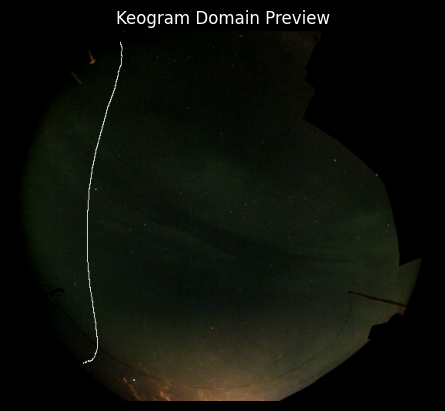

In [ ]:
# define a curve in lat/lon space
latitudes = np.linspace(51.0, 62.0, 50)
longitudes = -102.0 + 5 * np.sin(np.pi * (latitudes - 51.0) / (62.0 - 51.0))

# create the custom keogram
geo_keo = at.keogram.create_custom(rgb_images,
                                   data.timestamp,
                                   coordinate_system="geo",
                                   width=2,
                                   x_locs=longitudes,
                                   y_locs=latitudes,
                                   preview=True,
                                   altitude_km=115,
                                   skymap=skymap_data.data[0],
                                   metric="median")

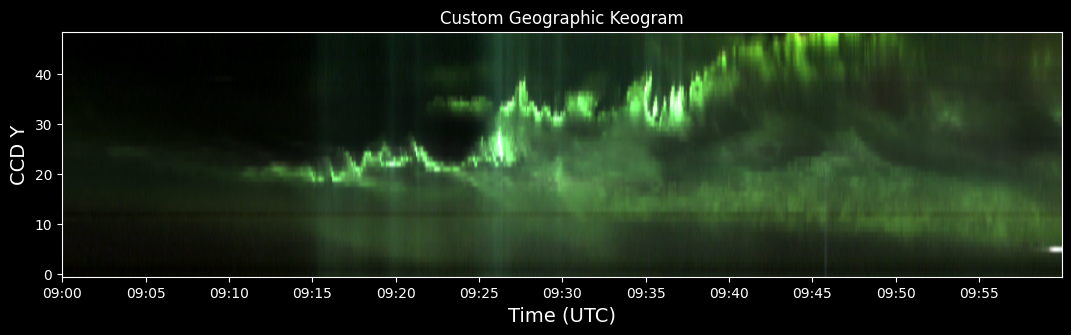

In [ ]:
# plot the keogram
geo_keo.plot(title="Custom Geographic Keogram", figsize=(10, 7), aspect=6)